#1. 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#2. 데이터 EDA


In [3]:
print(df["Outcome"].value_counts())

0    500
1    268
Name: Outcome, dtype: int64


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

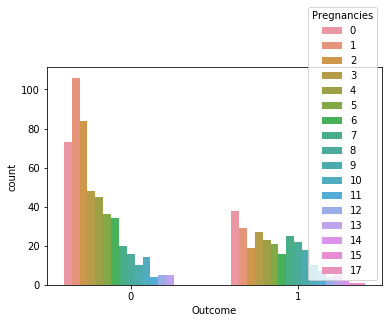

In [5]:
import seaborn as sns

sns.countplot(data=df, x = "Outcome", hue = "Pregnancies")

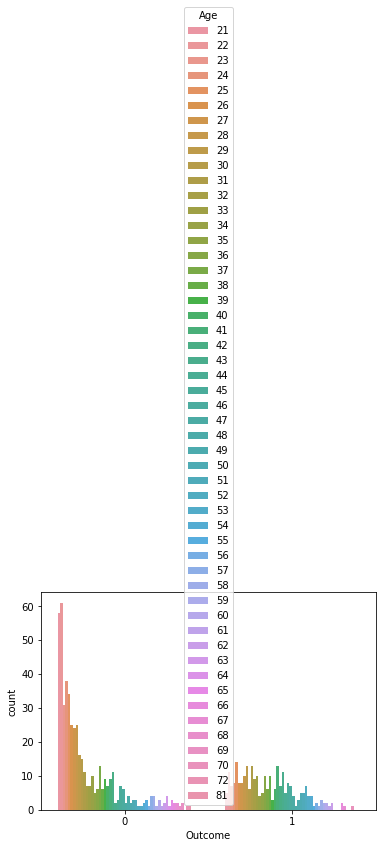

In [6]:
sns.countplot(data=df, x = "Outcome", hue = "Age")

In [7]:
df["Obesity"] = df["BMI"]

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Obesity
0,6,148,72,35,0,33.6,0.627,50,1,33.6
1,1,85,66,29,0,26.6,0.351,31,0,26.6
2,8,183,64,0,0,23.3,0.672,32,1,23.3
3,1,89,66,23,94,28.1,0.167,21,0,28.1
4,0,137,40,35,168,43.1,2.288,33,1,43.1


In [8]:
df.loc[df["BMI"]<18.5,"Obesity"]=0
df.loc[(df["BMI"]>=18.5)&(df["BMI"]<23),"Obesity"]=1
df.loc[(df["BMI"]>=23)&(df["BMI"]<25),"Obesity"]=2
df.loc[(df["BMI"]>=25)&(df["BMI"]<30),"Obesity"]=3
df.loc[(df["BMI"]>=30)&(df["BMI"]<35),"Obesity"]=4
df.loc[df["BMI"]>=35,"Obesity"]=5

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Obesity
0,6,148,72,35,0,33.6,0.627,50,1,4.0
1,1,85,66,29,0,26.6,0.351,31,0,3.0
2,8,183,64,0,0,23.3,0.672,32,1,2.0
3,1,89,66,23,94,28.1,0.167,21,0,3.0
4,0,137,40,35,168,43.1,2.288,33,1,5.0


In [9]:
df.loc[df["Age"]<10,"Age"]=0
df.loc[(df["Age"]>=10)&(df["Age"]<20),"Age"]=1
df.loc[(df["Age"]>=20)&(df["Age"]<30),"Age"]=2
df.loc[(df["Age"]>=30)&(df["Age"]<40),"Age"]=3
df.loc[(df["Age"]>=40)&(df["Age"]<50),"Age"]=4
df.loc[df["Age"]>=50,"Age"]=5

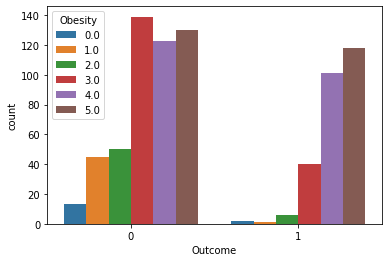

In [10]:
sns.countplot(data=df, x='Outcome', hue='Obesity')

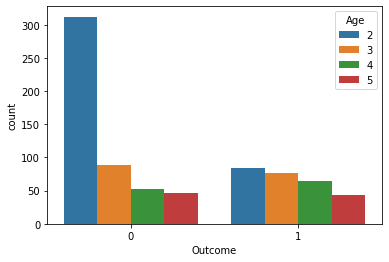

In [11]:
sns.countplot(data=df, x='Outcome', hue='Age')

0.254    6
0.258    6
0.259    5
0.238    5
0.207    5
        ..
0.886    1
0.804    1
1.251    1
0.382    1
0.375    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64

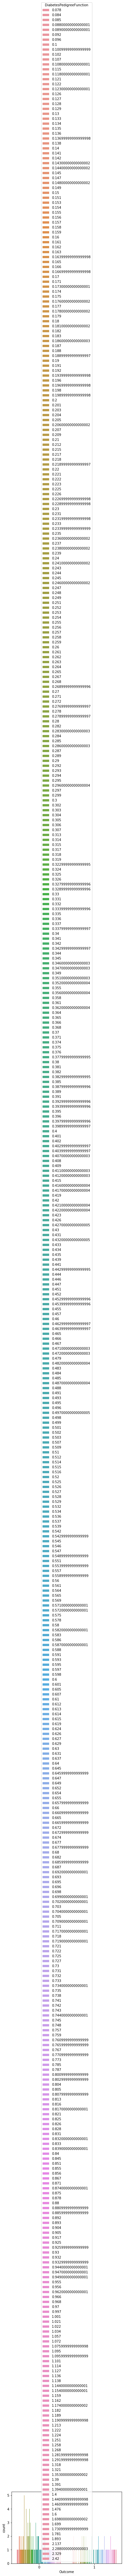

In [12]:
sns.countplot(data=df, x='Outcome', hue='DiabetesPedigreeFunction')
df["DiabetesPedigreeFunction"].value_counts()

In [13]:
df.loc[df["DiabetesPedigreeFunction"]<0.5,"DiabetesPedigreeFunction"]=0
df.loc[(df["DiabetesPedigreeFunction"]>=0.5)&(df["DiabetesPedigreeFunction"]<1),"DiabetesPedigreeFunction"]=1
df.loc[(df["DiabetesPedigreeFunction"]>=1)&(df["DiabetesPedigreeFunction"]<1.5),"DiabetesPedigreeFunction"]=2
df.loc[(df["DiabetesPedigreeFunction"]>=1.5)&(df["DiabetesPedigreeFunction"]<2),"DiabetesPedigreeFunction"]=3
df.loc[(df["DiabetesPedigreeFunction"]>=2)&(df["DiabetesPedigreeFunction"]<2.5),"DiabetesPedigreeFunction"]=4
df.loc[df["DiabetesPedigreeFunction"]>=2.5,"DiabetesPedigreeFunction"]=5

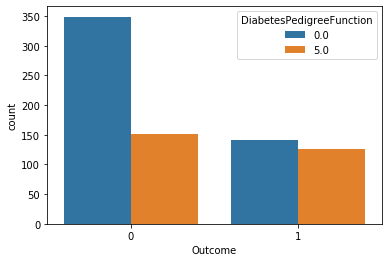

In [14]:
sns.countplot(data=df, x='Outcome', hue='DiabetesPedigreeFunction')


#3. Train


In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Obesity
0,6,148,72,35,0,33.6,5.0,5,1,4.0
1,1,85,66,29,0,26.6,0.0,3,0,3.0
2,8,183,64,0,0,23.3,5.0,3,1,2.0
3,1,89,66,23,94,28.1,0.0,2,0,3.0
4,0,137,40,35,168,43.1,5.0,3,1,5.0


In [16]:
f = df.iloc[:, -1]
f.head()

0    4.0
1    3.0
2    2.0
3    3.0
4    5.0
Name: Obesity, dtype: float64

In [17]:
X = df[["Pregnancies", "Glucose", "BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction","Age","Obesity","Outcome"]]
y = df[["Outcome"]].values.ravel()



In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
 
print('모든 데이터', df.shape)
print('training set', x_train.shape, y_train.shape)
print('test set',x_test.shape)

모든 데이터 (768, 10)
training set (614, 10) (614,)
test set (154, 10)


In [20]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Obesity,Outcome
725,4,112,78,40,0,39.4,0.0,3,5.0,0
5,5,116,74,0,0,25.6,0.0,3,3.0,0
458,10,148,84,48,237,37.6,5.0,5,5.0,1
135,2,125,60,20,140,33.8,0.0,3,4.0,0
734,2,105,75,0,0,23.3,5.0,5,2.0,0
...,...,...,...,...,...,...,...,...,...,...
320,4,129,60,12,231,27.5,5.0,3,3.0,0
325,1,157,72,21,168,25.6,0.0,2,3.0,0
310,6,80,66,30,0,26.2,0.0,4,3.0,0
226,0,101,76,0,0,35.7,0.0,2,5.0,0


In [21]:
y_test

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [22]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(solver= "liblinear").fit(x_train, y_train)

preds=lr.predict(x_test)

In [23]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

#4. 평가

In [24]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix(y_test, pred) #교차행렬
    accuracy = accuracy_score(y_test , pred) #정확도
    precision = precision_score(y_test , pred) #정밀도
    recall = recall_score(y_test , pred) #재현도
    f1 = f1_score(y_test,pred) #F1스코어
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

In [25]:
get_clf_eval(y_test, preds)

오차 행렬
[[109   0]
 [  0  45]]
정확도: 1.0000, 정밀도: 1.0000, 재현율: 1.0000, F1:1.0000


In [26]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr.predict_proba(x_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index 10개: [0]
샘플용 10개의 임곗값:  [1.99]
샘플 임곗값별 FPR:  [0.]
샘플 임곗값별 TPR:  [0.]


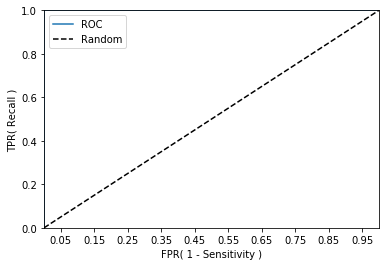

In [27]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr.predict_proba(x_test)[:, 1] )


In [28]:
from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(y_test, preds)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 1.0000
